# Summarizing metrics from SDT horiz lines

Leanne Friedrich 5/4/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_under_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [137]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'underSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolder
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnormd, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink_Ca, ink_CaInv, ink_diluent, ink_

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


In [99]:
ms.keyTableVar('meanT')

,1,2,3
wp,,,
wo,meanT_w1o,meanT_w2o,meanT_w3o
dw/dt,dmeanTdt_w1o,dmeanTdt_w2o,dmeanTdt_w3o
wrelax,,,
write,,delta_meanT_write2,
dp,,,
do,meanT_d1o,meanT_d2o,
dd/dt,dmeanTdt_d1o,dmeanTdt_d2o,
drelax,,,
disturb,delta_meanT_disturb1,delta_meanT_disturb2,


In [172]:
ms.ss.ink_base.unique()

array(['PDMS_3'], dtype=object)

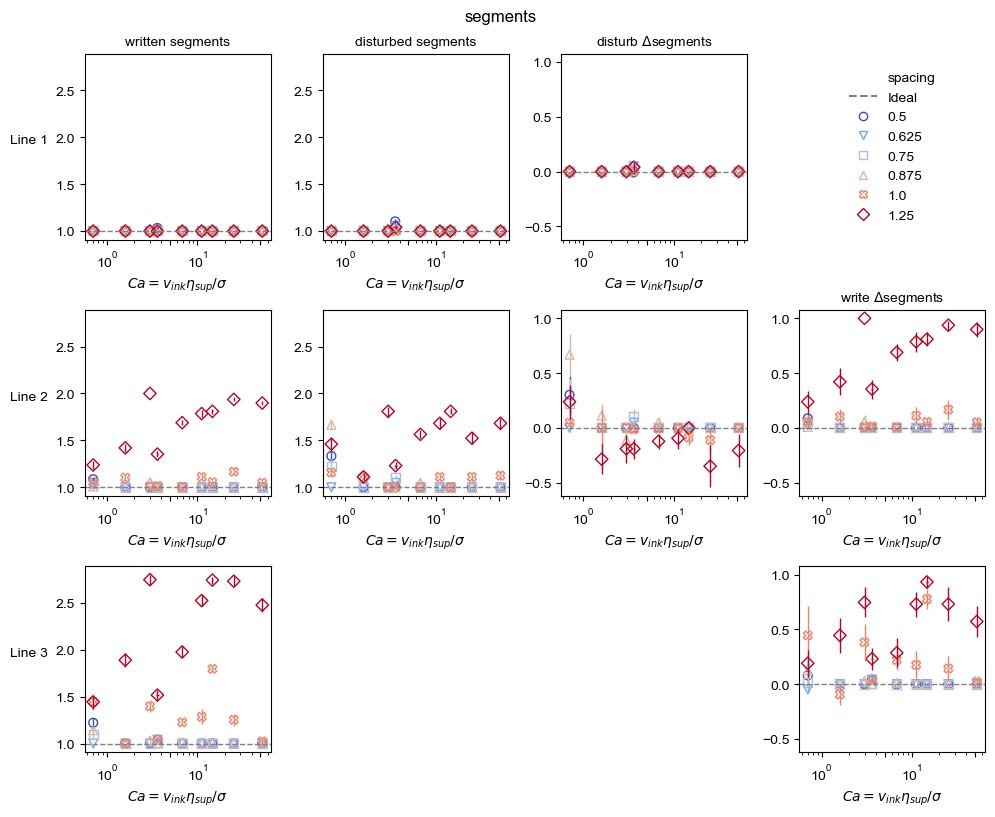

In [172]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='segments', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.1)
yvl.fig

In [60]:
ms.reduceRows('yc_w1o', yvarmax=-0.2);

,ink_shortname,sup_shortname,int_Ca,spacing,yc_w1o
425,PDMSS6-S85-0.05,4.0,14.00,0.62,-0.64
397,PDMSS6-S85-0.05,3.0,2.98,0.88,-0.64
395,PDMSS6-S85-0.05,3.0,2.98,0.62,-0.59
333,PDMSS10-S85-0.05,3.0,2.98,0.75,-0.59
433,PDMSS6-S85-0.05,4.0,14.00,0.88,-0.57
354,PDMSS10-S85-0.05,3.5,6.78,1.25,-0.57
429,PDMSS6-S85-0.05,4.0,14.00,1.25,-0.56
399,PDMSS6-S85-0.05,3.0,2.98,1.25,-0.55
389,PDMSS6-S85-0.05,3.0,2.98,0.62,-0.55
424,PDMSS6-S85-0.05,4.0,14.00,0.50,-0.54


In [61]:
ms.openFolder(209)

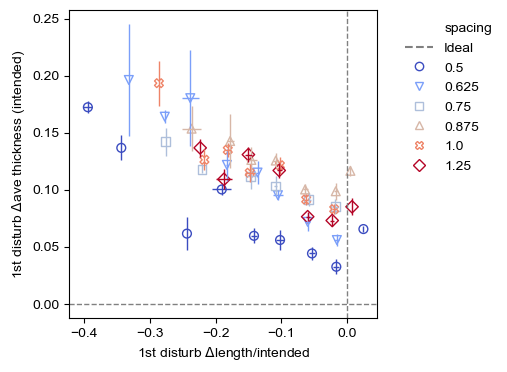

In [175]:
xvar = 'delta_wn_disturb1'
yvar = 'delta_meanT_disturb1'
cvar = 'spacing'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=False
                    , logy=False, dx=0.1, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), xideal=me.ideals().yideal(xvar), legendloc='right')
p2.fig

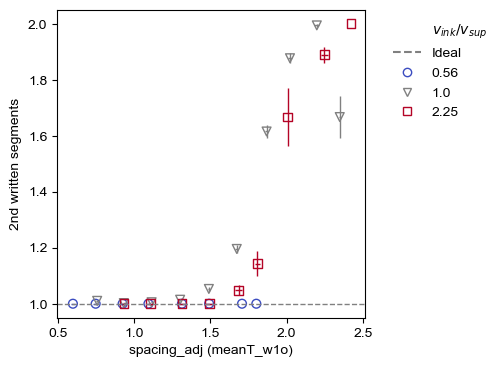

In [178]:
xvar = 'spacing_adj'
yvar = 'segments_w2o'
cvar = 'vRatio'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=False
                    , logy=False, dx=0.1, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), xideal=me.ideals().yideal(xvar), legendloc='right')
p2.fig

In [164]:
ms.reduceRows('delta_wn_write2', ms.ss.spacing_adj>2.25, ms.ss.vRatio==1, yvarmin=0.05);

,ink_shortname,sup_shortname,int_Ca,spacing,delta_wn_write2
261,PDMSS7-S20-0.5,4.0,52.38,1.25,0.06
378,PDMSS10-S85-0.05,4.0,14.00,1.25,0.11


In [161]:
ms.openFolder(378)

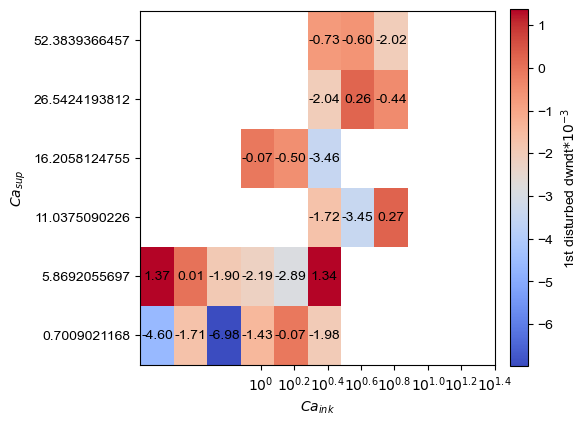

In [130]:
xvar = 'ink_Ca'
zvar = 'sup_Ca'
yvar = 'dwndt_d1o'
yvl = mp.meshPlot(ms, ms.ss[ms.ss.spacing==0.875], xvar=xvar, zvar=yvar, yvar=zvar, llist=[1]
             , plist=['wo'], plotType='ppt', yideal=me.ideals().yideal(yvar), gradColor=mp.colorModes.discreteZvar
                   , logy=False, logx=True, mode='scatter', dx=0.1, figsize=(5,5), fs=10, rigid=True)
# yvl.export(os.path.join(cfg.path.fig, r'SDT\images\plots', f'{xvar}_{yvar}_{spacing}.png'))

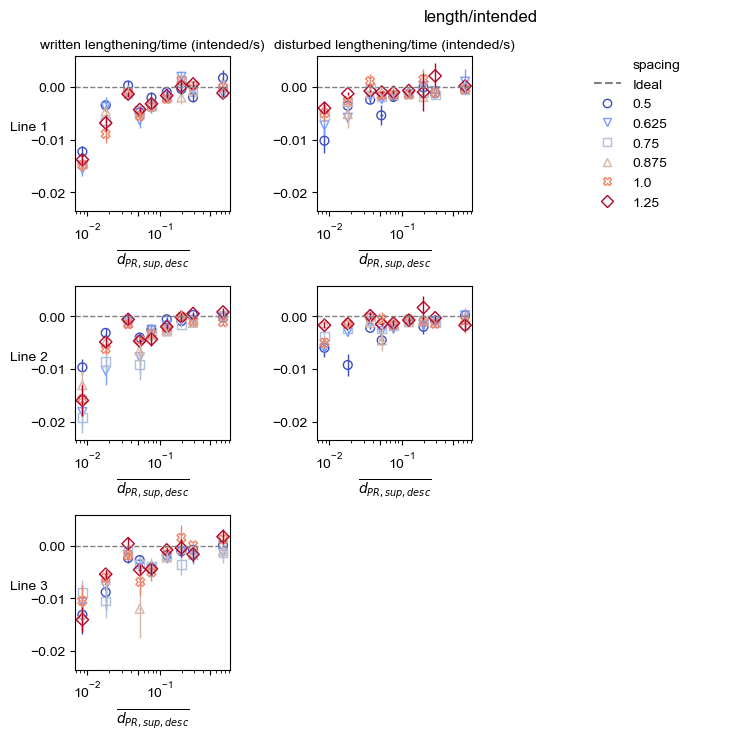

In [30]:
yvl = mp.yvarlines(ms, ms.ss, xvar='sup_dnormd', yvar='wn', cvar='spacing', llist=[1, 2, 3]
             , plist=['dwdt', 'dddt', 'wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.1)
yvl.fig

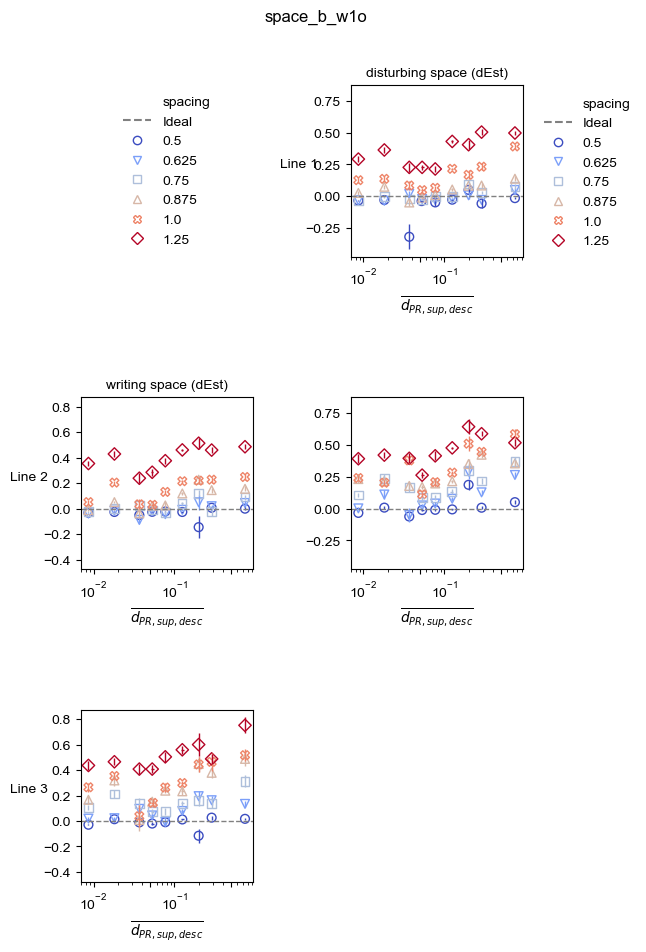

In [138]:
yvl = mp.yvarlines(ms, ms.ss, xvar='sup_dnormd', yvar='space_b', cvar='spacing', llist=[1, 2, 3]
             , plist=['wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.1)
yvl.fig

In [123]:
ms.reduceRows('space_b_d1p', yvarmax=-0.1);

,ink_shortname,sup_shortname,int_Ca,spacing,space_b_d1p
382,PDMSS6-S85-0.05,3.0,2.98,0.50,-0.41
325,PDMSS10-S85-0.05,3.0,2.98,0.50,-0.35
400,PDMSS6-S85-0.05,3.5,6.78,0.50,-0.26
436,PDMSS8-S85-0.05,3.0,2.98,0.50,-0.20
385,PDMSS6-S85-0.05,3.0,2.98,0.88,-0.19
232,PDMSS7-S20-0.5,3.5,25.35,0.50,-0.12


In [129]:
ms.openFolder(232)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w1oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w1oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dwndt_w1oReg.png and .svg


,variable,Spearman coeff,Spearman p
0,$Ca$,0.52,3.7e-50
1,$\overline{d_{PR.sup.asc}}$,0.57,4.5e-63
2,$\overline{d_{PR.sup.desc}}$,0.54,4.0e-55
3,$Oh_{sup}$,0.57,1.3e-62
4,$Oh_{ink}\times Oh_{sup}$,0.55,3.0e-58


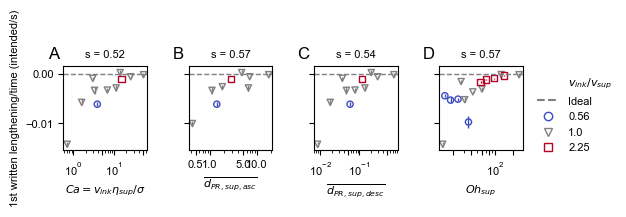

In [143]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_w1o==1], 'dwndt_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dmeanTdt_w1oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dmeanTdt_w1oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dmeanTdt_w1oReg.png and .svg


,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,-0.31,4.7e-17


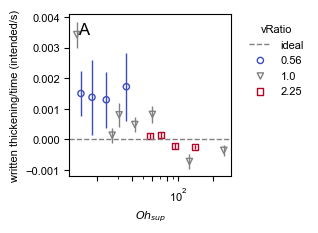

In [134]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_w1o==1], 'dmeanTdt_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
rgt.df

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\wn_w1oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\wn_w1oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\wn_w1oReg.png and .svg


,variable,Spearman coeff,Spearman p
2,$Re_{ink}\times Re_{sup}$,-0.50,2.7e-45


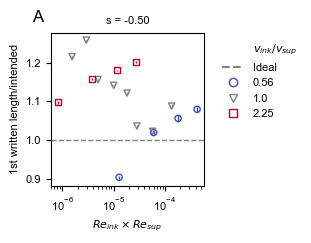

In [117]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_w1o==1], 'wn_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,-0.65,1.8e-87
1,$Oh_{ink}/Oh_{sup}$,0.62,4.1e-75
2,$Re_{sup}$,0.73,1.1e-117
3,$Re_{ink}/Re_{sup}$,-0.68,4.5e-98
4,$\eta_{sup}$,-0.69,5.8e-101


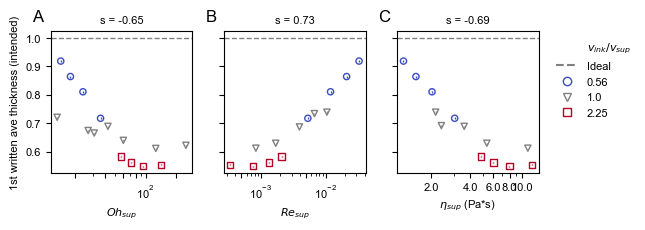

In [113]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_w1o==1], 'meanT_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,0.53,1.3e-18
1,$\overline{d_{PR.sup.asc}}$,0.61,1.1e-25
2,$\overline{d_{PR.sup.desc}}$,0.57,1.0e-21
3,$\overline{d_{PR.ink.desc}}\times \overline{d_...,0.54,4.7e-19
4,$Oh_{sup}$,0.53,1.2e-18
5,$Oh_{ink}\times Oh_{sup}$,0.57,6.3e-22


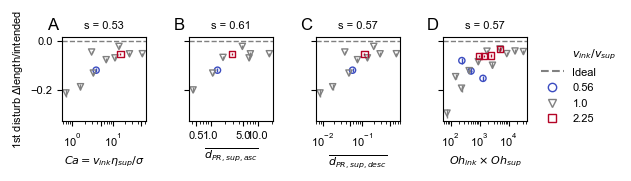

In [114]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$\overline{d_{PR.sup.asc}}$,-0.35,3.5e-08


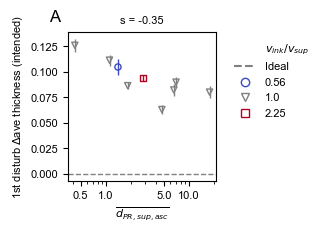

In [115]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,0.49,1.8e-15


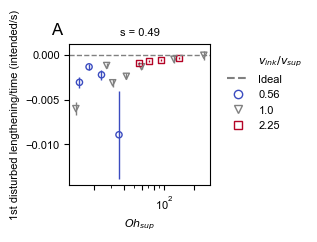

In [116]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_d1o==1], 'dwndt_d1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.63,1.6e-05
1,$\overline{d_{PR.sup.asc}}$,-0.72,1.4e-07
2,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.66,4.4e-06
3,$\overline{d_{PR.ink.desc}}$,-0.67,2.3e-06
4,$\overline{d_{PR.sup.desc}}$,-0.66,4.4e-06
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.67,1.9e-06
6,$Oh_{sup}$,-0.67,2.1e-06
7,$Oh_{ink}\times Oh_{sup}$,-0.74,4.1e-08
8,$Re_{ink}\times Re_{sup}$,0.58,8.2e-05
9,$\eta_{ink}\times \eta_{sup}$,-0.57,1.2e-04


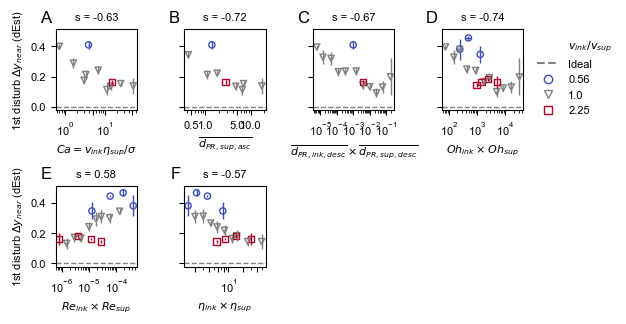

In [102]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_y0_disturb1', spacing=1.250, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.54,3.5e-04
1,$Ca_{sup}$,-0.53,3.8e-04
2,$Ca_{ink}\times Ca_{sup}$,-0.56,1.7e-04
3,$\overline{d_{PR.sup.asc}}$,-0.60,4.0e-05
4,$\overline{d_{PR.sup.desc}}$,-0.60,4.3e-05
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.60,3.9e-05
6,$Oh_{sup}$,-0.62,2.3e-05
7,$Oh_{ink}\times Oh_{sup}$,-0.67,2.6e-06
8,$\eta_{ink}\times \eta_{sup}$,-0.53,4.5e-04


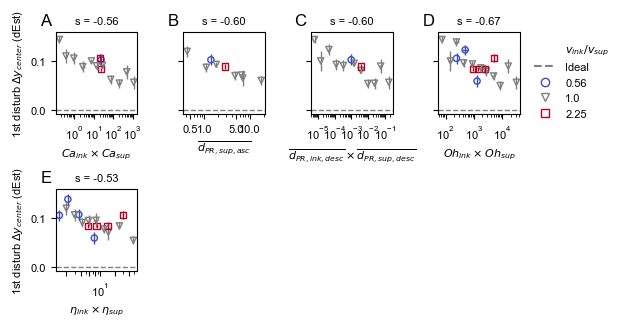

In [101]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb1', spacing=1.250, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,0.51,1.3e-03
1,$We_{ink}$,0.61,6.1e-05


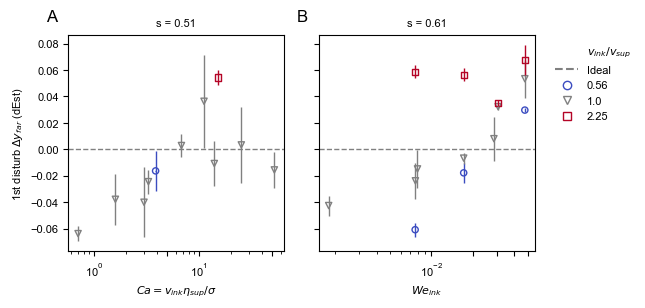

In [120]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yf_disturb1', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

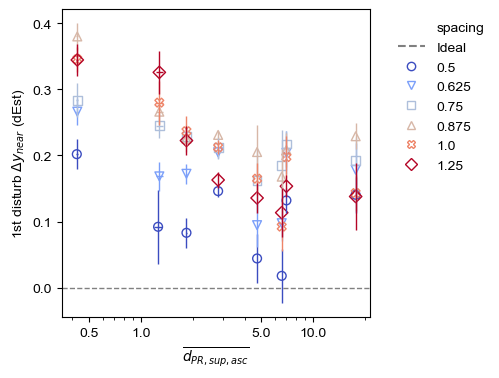

In [78]:
xvar = 'sup_dnorma'
yvar = 'delta_y0_disturb1'
cvar = 'spacing'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True
                    , logy=False, dx=0.1, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar),  legendloc='right')
p2.fig

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,0.57,1.1e-04
1,$Re_{sup}$,-0.54,3.1e-04
2,$Re_{ink}\times Re_{sup}$,-0.51,8.5e-04
3,$\eta_{sup}$,0.51,8.6e-04


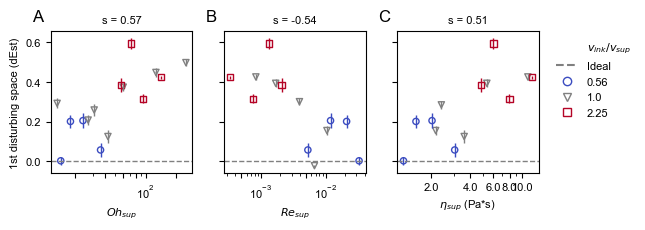

In [140]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p', spacing=1.25, logy=False, printOut=False,  package='pgfplot', trimVariables=True
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
3,$Re_{ink}/Re_{sup}$,-0.40,7.6e-06


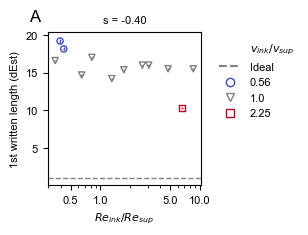

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'w_w1o', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.79,2.3e-51


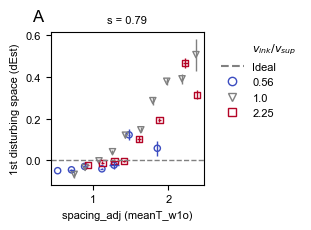

In [135]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.63,7.5e-55
1,spacing_adj,0.61,2.9e-50


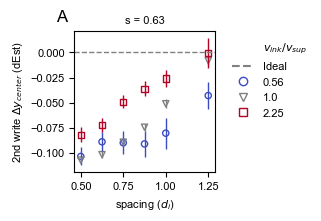

In [147]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.52,2.7e-34
1,$\overline{d_{PR.sup.asc}}$,-0.53,2.4e-35
2,$\overline{d_{PR.sup.desc}}$,-0.51,2.6e-33


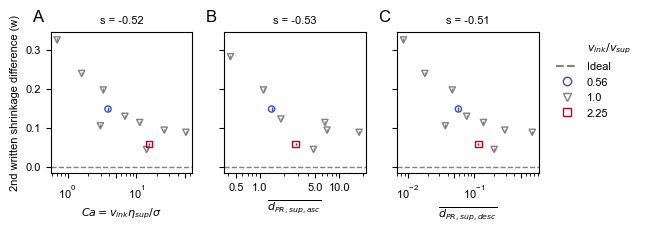

In [171]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.59,7.3e-47
1,spacing_adj,0.59,2.1e-46


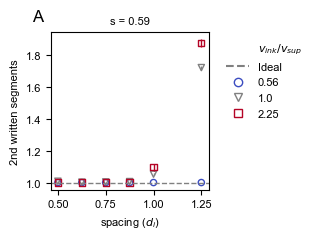

In [183]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.64,1.7e-10
1,$Oh_{sup}$,0.55,1.3e-07
2,$Re_{sup}$,-0.51,1.2e-06
3,$Re_{ink}\times Re_{sup}$,-0.52,5.8e-07


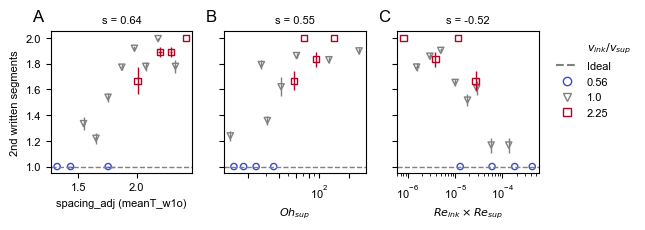

In [182]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [188]:
ms.reduceRows('segments_w2o', ms.ss.vRatio==0.56, ms.ss.spacing_adj<1.5)

,ink_shortname,sup_shortname,int_Ca,spacing,segments_w2o
568,PDMSS8-S85-0.05,3.5,3.83,0.50,1.0
643,PDMSS8-S85-0.05,3.5,3.85,0.50,1.0
646,PDMSS8-S85-0.05,3.5,3.86,0.50,1.0
650,PDMSS8-S85-0.05,3.5,3.87,0.50,1.0
652,PDMSS8-S85-0.05,3.5,3.83,0.62,1.0
655,PDMSS8-S85-0.05,3.5,3.85,0.62,1.0
658,PDMSS8-S85-0.05,3.5,3.86,0.62,1.0
662,PDMSS8-S85-0.05,3.5,3.87,0.62,1.0
664,PDMSS8-S85-0.05,3.5,3.83,0.75,1.0
667,PDMSS8-S85-0.05,3.5,3.85,0.75,1.0


In [192]:
ms.openFolder(622)

In [196]:
ms.ss.gname.unique()

array(['total'], dtype=object)